In [26]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import rotate
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.metrics import peak_signal_noise_ratio as PSNR
from scipy import signal
import skimage.util


def gaussian_filter(n_rows, n_cols, stdv):
    """
    Returns a 2d Gaussian image filter.
    """
    g_r = signal.windows.gaussian(n_rows, stdv)
    g_c = signal.windows.gaussian(n_cols, stdv)

    G = np.outer(g_r, g_c)

    return G/np.max(G)

plt.gray()
lena= rgb2gray(imread('../lab_images/lena.tiff'))
frequnoisy = imread('../lab_images/frequnoisy.tif').astype(np.float64)/255

<Figure size 640x480 with 0 Axes>

Let us now study the characteristics of an image in frequency domain. For this study, we will create a new
256×256 test image, which consists of a white rectangle.
f = np.zeros((256,256))
f[:,107:148] = 1
Plot the test image. Now plot the Fourier spectra of the image. Be sure to use the cmap = ‘gray‘ argument
in the plt.imshow funtion. The np.f f t2, np.f f tshif t, and np.abs functions will be useful here

(-0.5, 255.5, 255.5, -0.5)

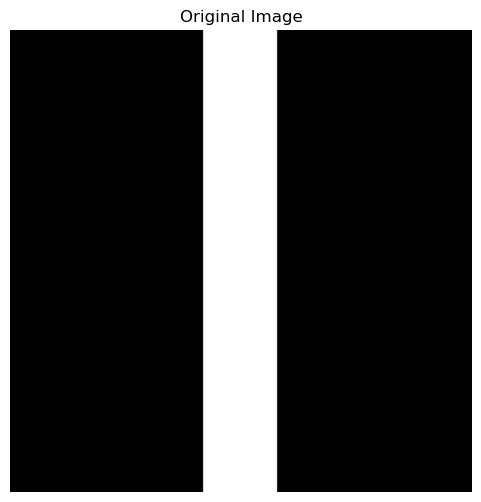

In [27]:
f = np.zeros((256,256))
f[:,107:148] = 1

# Original Image
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(f, cmap='gray')
plt.axis('off')

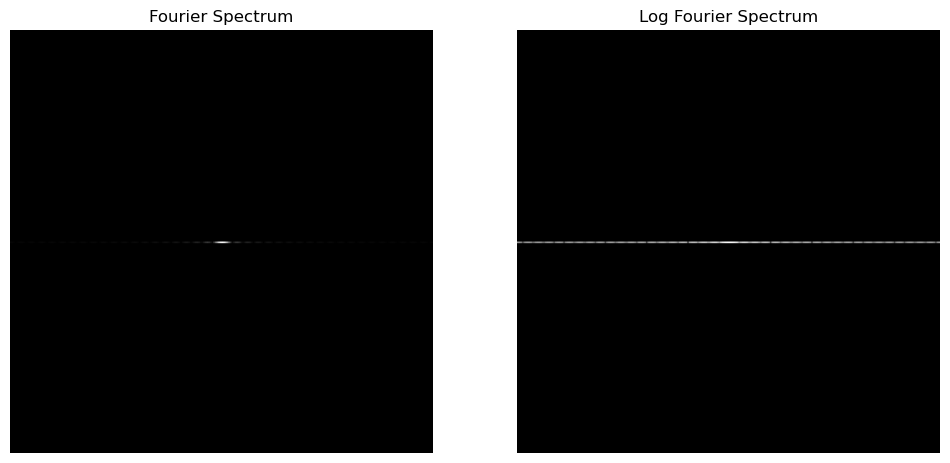

In [52]:
# Compute the Fourier Transform
F = np.fft.fft2(f)                # Compute the 2D FFT
F_shifted = np.fft.fftshift(F)    # Shift zero frequency to the center
magnitude_spectrum = np.abs(F_shifted)  # Compute magnitude spectrum

# Plot Fourier spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Fourier Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Log Fourier Spectrum")
plt.imshow(np.log(magnitude_spectrum + 1), cmap='gray')
plt.axis('off')

plt.show()


1. What can you say about the general distribution of energy in the Fourier spectra? Why?

In the Fourier spectrum, the intensity of the magnitude spectrum (energy) is in the center of the image. This is because the Fourier transform shifts the zero frequency to the center of the plot. The high-frequency components are located towards the edges of the spectrum.

The original image consists of a block of constant intensity (1) in the middle, surrounded by zeros. This block creates sharp transitions at its boundaries. Those sharp edges of the block contribute to higher frequencies, but since the image has more smooth areas than abrupt changes, the energy is mainly concentrated in the low-frequency components at the center.

2. What characteristics about the test image can you infer from the Fourier spectra?

Vertical Structure: The vertical lines of higher magnitude in the Fourier spectrum indicate that there are significant vertical edges in the image. This is because the white rectangle introduces sharp vertical boundaries, which are represented by the vertical energy distribution in the Fourier domain.

Horizontal Symmetry: The test image is horizontally symmetric, which is reflected in the symmetry of the Fourier spectrum. The magnitudes are evenly distributed on both sides of the vertical centerline in the spectrum.

Rectangular Shape: The sharp, straight edges of the white rectangle in the spatial domain translate into broader high-frequency components in the frequency domain, showing the presence of sharp transitions along the rectangle's boundaries.

Now rotate the test image by 45 degrees and plot both the Fourier spectra and the image.
The skimage.transform.rotate function will be useful here.

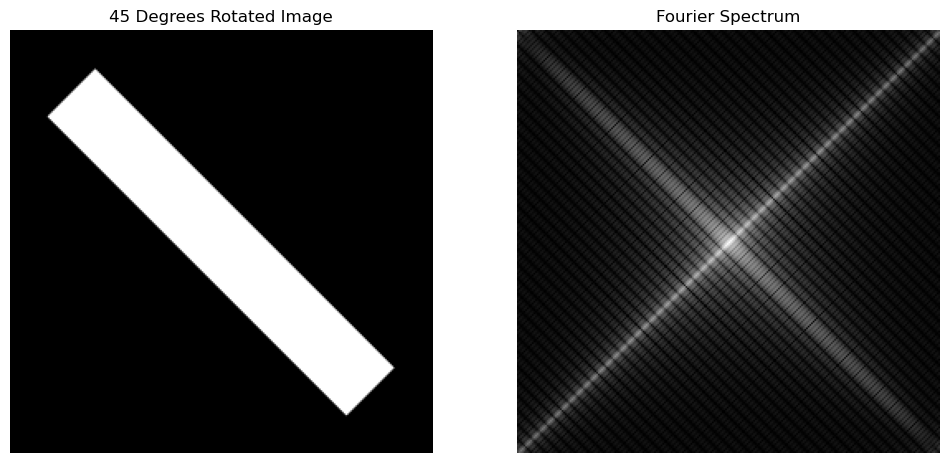

In [51]:
rotated = rotate(f, angle=45)

# Original Image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("45 Degrees Rotated Image")
plt.imshow(rotated, cmap='gray')
plt.axis('off')

# Compute the Fourier Transform
F_rotated = np.fft.fft2(rotated)
F_shifted_rotated = np.fft.fftshift(F_rotated)
magnitude_spectrum_rotated = np.abs(F_shifted_rotated)

# Plot Fourier spectrum
plt.subplot(1, 2, 2)

plt.title("Fourier Spectrum")
plt.imshow(np.log(magnitude_spectrum_rotated + 1), cmap='gray')
plt.axis('off')

plt.show()

3. How did the Fourier spectra change from the original image (before rotation)?

The Fourier spectra of the rotated image is the same as the original image's spectra, but it's rotated 45 degrees clockwise. This transformation demonstrates the property of the Fourier transform, where a spatial rotation of the image results in a corresponding rotation in the frequency domain. Hence, the essential characteristics of the image remain intact.

4. What conclusions and observations can be made about image characteristics based on the Fourier spectra of both original image and the rotated image?

The rotation of the image leads to a corresponding rotation of the Fourier spectra, demonstrating the invariance of frequency content to spatial orientation. This indicates that the frequency representation captures structural information, such as edges and patterns, and highlights the sensitivity of the spectra to variations in edge orientation. The presence of dominant peaks in the spectra reflects the image's geometric features.

Now let us study the contribution of Fourier amplitude and phase to the underlying image. Load the Lena
image and convert it to a grayscale image using the skimage.color.rgb2gray function. Now compute the
amplitude and phase of the Lena image. Remember that the amplitude component A is the magnitude of the
Fourier complex component (use the np.abs function) and the phase component θ can be found by simply
dividing the Fourier component F (w) by the amplitude A since
F (w) = A ∗ (cos(θ) + j sin(θ))
Now perform the inverse Fourier transform on the amplitude component A and the phase component θ
separately. np.fft.ifft2 and np.fft.ifftshift will come in handy. Plot the original image, the reconstructed image
using just the amplitude component, and the reconstructed image using just the phase component

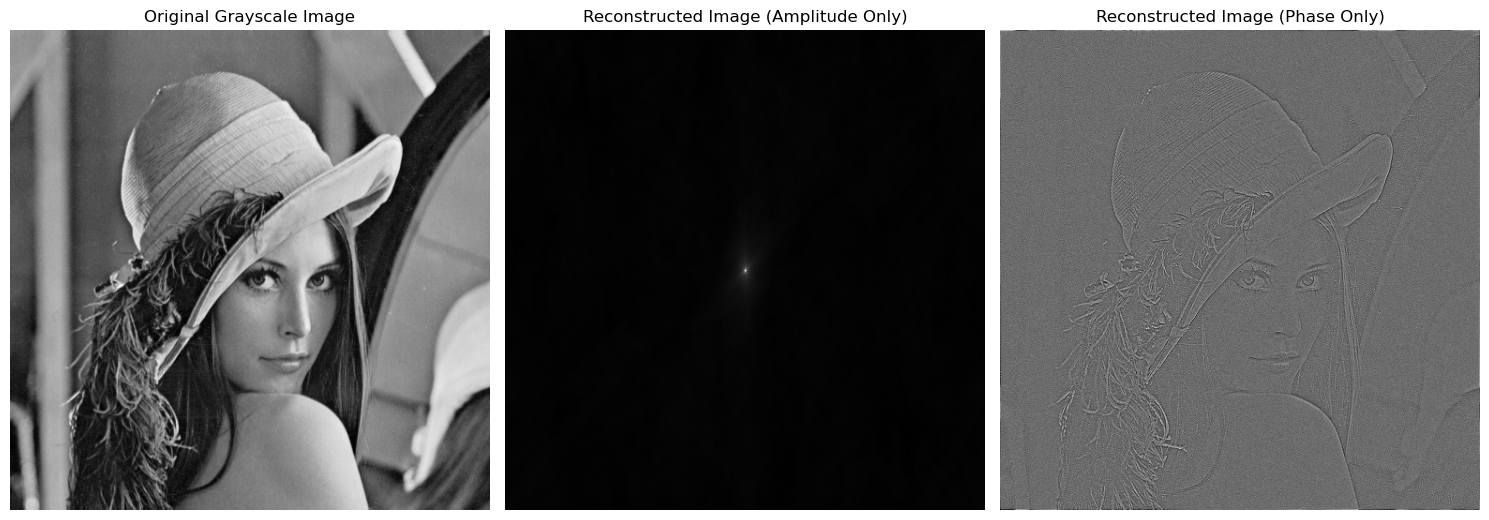

In [30]:
# Compute 2D Fourier transform of Lena
F_lena = np.fft.fft2(lena)

# Compute amplitude and phase
A = np.abs(F_lena)  # Amplitude
phase = F_lena/A # Phase

# Reconstruct images using inverse Fourier transform
# Inverse Fourier transform using amplitude only
inverse_fourier_A = np.fft.ifftshift(np.fft.ifft2(A))

# Inverse Fourier transform using phase only (amplitude set to 1)
inverse_fourier_phase = np.fft.ifft2(phase)

# Plot the original image, reconstructed images
plt.figure(figsize=(15, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(lena, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Reconstructed Image using Amplitude
plt.subplot(1, 3, 2)
plt.imshow(np.real(inverse_fourier_A), cmap='gray')
plt.title('Reconstructed Image (Amplitude Only)')
plt.axis('off')

# Reconstructed Image using Phase
plt.subplot(1, 3, 3)
plt.imshow(np.real(inverse_fourier_phase), cmap='gray')
plt.title('Reconstructed Image (Phase Only)')
plt.axis('off')

plt.tight_layout()
plt.show()

5. Describe how the reconstructed image from the amplitude component look like? What image characteristics does the amplitude component capture? (Hint: apply np.log to the result of the inverse fft).

The reconstructed image from the amplitude component looks quite terrible. It is a white dot in the center of the image. Applying the log allows us to see a better distribution of intensities. This reconstructed images is a white dot because the amplitude captures information about the strength of the frequencies, but without phase information, the spatial distribution and structure of those frequencies are lost. So the Fourier transform collapses to a central bright point due to the lack of phase data needed to reassemble the image with the correct structure. 

6. Describe how the reconstructed image from the phase component look like? What image characteristics does the phase component capture?

The reconstructed image from the phase component is then the opposite, getting the structural details of the image in a grainy, low-contrast manner. Since phase is not included, there's a lack of intensity information, but the phase retains important details about the spatial arrangement of features like edges, and shapes, resulting in a "better" reconstruction of Lena in terms of being able to see some of her features.

(-0.5, 511.5, 511.5, -0.5)

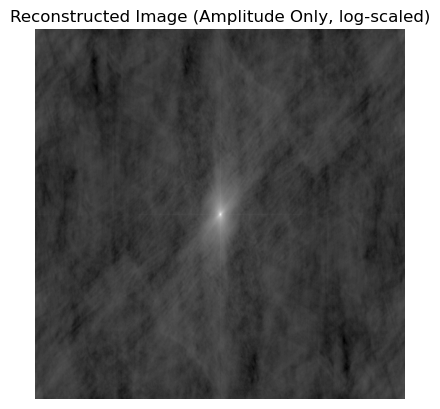

In [31]:
inverse_fourier_A_log = np.log(inverse_fourier_A)

# Plot the log-transformed reconstructed image
plt.imshow(np.real(inverse_fourier_A_log), cmap='gray')
plt.title('Reconstructed Image (Amplitude Only, log-scaled)')
plt.axis('off')

3 Noise Reduction in the Frequency Domain

Let us now study noise reduction techniques based on frequency domain filtering as well as the effect of filter
parameters on image quality. Load the Lena image (adjust intensities to range of 0 to 1) and apply additive
Gaussian noise with variance of 0.005 to the image. The function skimage.util.random noise will be useful.
Plot the Log Fourier spectra of the original image and the noisy image by using the np.log function on the
Fourier spectra

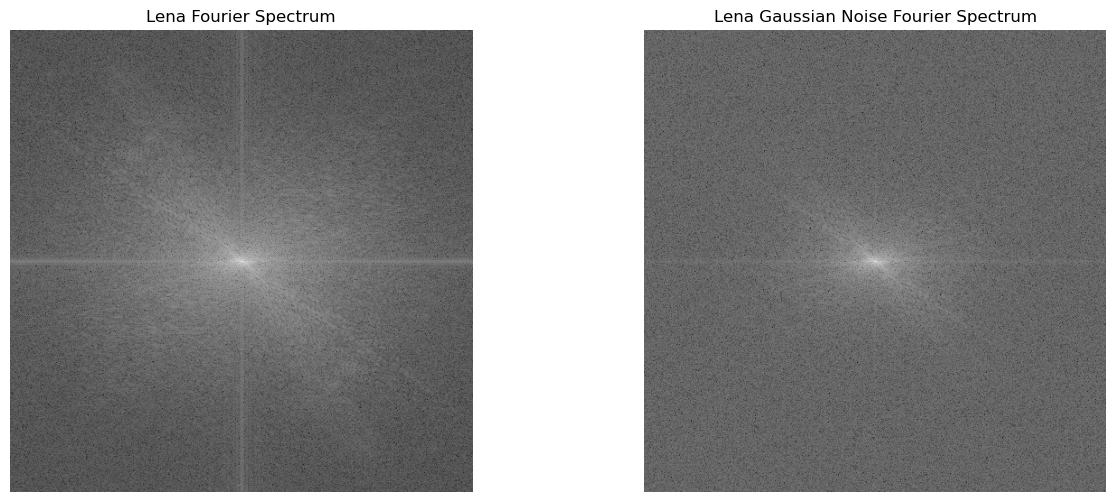

In [32]:
# lena_adjusted = lena.astype(np.float64)/255

# Fourier spectra original Lena image
F_lena = np.fft.fft2(lena)         # Compute the 2D FFT   
F_lena_shifted = np.fft.fftshift(F_lena)    # Shift zero frequency to the center
magnitude_spectrum = np.abs(F_lena_shifted) # Compute magnitude spectrum

# Gaussian noise added
lena_gaussian = skimage.util.random_noise(lena, mode='gaussian', var = 0.005)

# Fourier spectra of Gaussian noise added Lena image
F_lena_gaussian = np.fft.fft2(lena_gaussian)
F_lena_gaussian_shifted = np.fft.fftshift(F_lena_gaussian)
magnitude_spectrum_gaussian = np.abs(F_lena_gaussian_shifted) 

# Plot the original image, gaussian noise image
plt.figure(figsize=(15, 6))

# Plot Fourier spectrum
plt.subplot(1, 2, 1)
plt.title("Lena Fourier Spectrum")
plt.imshow(np.log(magnitude_spectrum), cmap='gray')
plt.axis('off')

# Plot Fourier spectrum
plt.subplot(1, 2, 2)
plt.title("Lena Gaussian Noise Fourier Spectrum")
plt.imshow(np.log(magnitude_spectrum_gaussian), cmap='gray')
plt.axis('off')

plt.show()

In [33]:
np.log(magnitude_spectrum_gaussian).min(), np.log(magnitude_spectrum_gaussian).max()

(-2.100279990421507, 11.695603340663167)

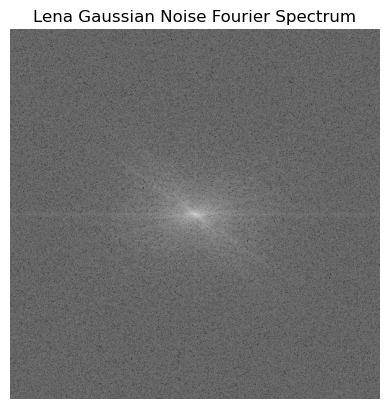

In [34]:
# Fourier spectra of Gaussian noise added Lena image
test = np.fft.fft2(lena_gaussian)
test1 = np.abs(test) 
test2 = np.fft.fftshift(test1)

plt.title("Lena Gaussian Noise Fourier Spectrum")
plt.imshow(np.log(test2), cmap='gray')
plt.axis('off')

plt.show()

In [35]:
np.log(test2).min(), np.log(test2).max()

(-2.100279990421507, 11.695603340663167)

7. Compare the two Fourier spectra. What are the differences? Where are these differences most visually prominent? Why?

In the original Lena fourier spectrum, the energy is concentrated along bright lines near the center, indicating strong low-frequency components, which are the smoother regions and edges in the image. Compared to the Lena Gaussian noise fourier spectrum, where the distribution is more diffused and uniform, with less pronounced bright lines. The random Gaussian noise introduces high-frequency components, spreading energy across a wider range of frequencies and reducing the clarity of the original low-frequency structure. The visual difference is most noticeable in the centre, where the original image retains a stronger energy concentration than the noisy image.

Now let us study the ideal low-pass filter. To create an ideal low-pass filter with a cut-off radius r, first you need to create an image of a white circle with radius r. One approach to do use the skimage.morphology disk function in the following way: 

from skimage.morphology import disk
h = disk(r)

Now create a black image (representing an energy-less Fourier spectra) and center the circle onto the black
image:

h freq = np.zeros(image size)
h freq[height of image//2-r: height of image//2+r+1, width of image//2-r: width of image//2+r+1] = h

Create and plot the Fourier spectra of the resulting low-pass filter h f req with a radius of 60. Now, apply the filter on the noisy image in the frequency domain and then perform an inverse Fourier transform. Plot the resulting denoised image and the corresponding PSNR.

In [36]:
# r = 60
def low_pass_filter(r, image):
    image_size = image.shape
    h = disk(r)
    h_freq = np.zeros(image_size)
    height, width = image_size
    h_freq[height//2 - r: height//2 + r + 1, width//2 - r: width//2 + r + 1] = h
    return h_freq

In [37]:
# h_freq = np.zeros(image_size)
# height, width = image_size
# h_freq[height//2 - r: height//2 + r + 1, width//2 - r: width//2 + r + 1] = h

In [38]:
# Apply the low-pass filter in the frequency domain
filtered_lena = F_lena_gaussian_shifted * low_pass_filter(60, lena)

# Inverse Fourier Transform to get the denoised image
denoised_lena = np.abs(np.fft.ifft2(filtered_lena))

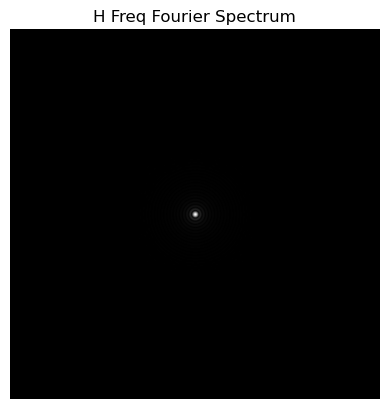

In [39]:
# Fourier spectra of Gaussian noise added Lena image
F_h_freq = np.fft.fft2(low_pass_filter(60, lena))
F_h_freq_shifted = np.fft.fftshift(F_h_freq)
magnitude_h_freq = np.abs(F_h_freq_shifted) 

plt.title("H Freq Fourier Spectrum")
plt.imshow(magnitude_h_freq, cmap='gray')
plt.axis('off')

plt.show()

(-0.5, 511.5, 511.5, -0.5)

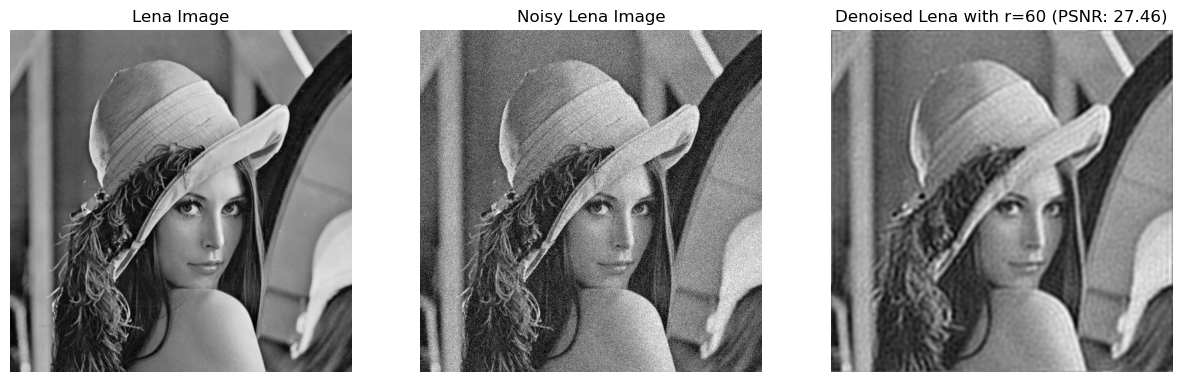

In [40]:
def PSNR(f,g):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))

psnr_value = PSNR(lena, denoised_lena)

# Plot the original image, gaussian noise image
plt.figure(figsize=(15, 6))

# Plot noisy image
plt.subplot(1, 3, 1)
plt.imshow(lena, cmap='gray')
plt.title('Lena Image')
plt.axis('off')

# Plot the denoised lena image
plt.subplot(1, 3, 2)
plt.imshow(lena_gaussian, cmap='gray')
plt.title('Noisy Lena Image')
plt.axis('off')

# Plot the denoised lena image
plt.subplot(1, 3, 3)
plt.imshow(denoised_lena, cmap='gray')
plt.title(f'Denoised Lena with r=60 (PSNR: {psnr_value:.2f})')
plt.axis('off')

8. Describe the appearance of the denoised image compared to the original and the noisy images. Why does it look this way? What does the ideal low-pass filter do?

The denoised and noisy images are both grainy in comparison to the original image. Although, the denoised image is blurrier than both. While the filter effectively reduces high-frequency noise, which causes the graininess in the noisy image, it also removes important high-frequency details like sharp edges and textures from the original image, resulting in blurriness. The remaining graininess is likely due to noise in the lower frequencies, which the filter does not eliminate. As a result, the denoised image has smoother regions but lacks the sharpness and detail present in the original, creating a balance between noise reduction and image clarity.

9. There is a particular artifact present in the restored image. What is it and why does it happen?

The particular artifact often seen in the restored image after applying an ideal low-pass filter is ringing (Gibbs phenomenon), which manifests as oscillations near sharp edges. This occurs because the ideal low-pass filter has a sharp cutoff in the frequency domain, causing abrupt transitions between frequencies that introduce discontinuities. In the spatial domain, these discontinuities lead to overshooting and undershooting near edges, producing the ringing effect. This artifact is especially prominent near sharp transitions in the image, where high-frequency components are heavily attenuated but not perfectly handled by the filter.

Now create a low-pass filter with a cut-off radius of 20 and apply it to the noisy image in the frequency domain and then perform an inverse Fourier transform. Plot the resulting denoised image and the corresponding PSNR

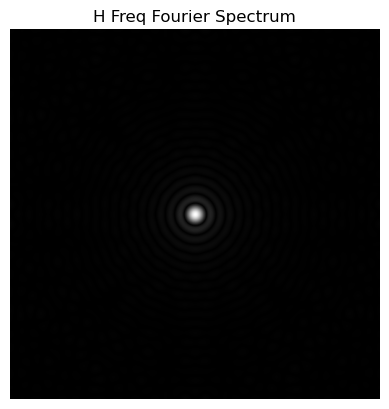

In [41]:
# Apply the low-pass filter in the frequency domain
filtered_lena_20 = F_lena_gaussian_shifted * low_pass_filter(20, lena)

# Inverse Fourier Transform to get the denoised image
denoised_lena_20 = np.abs(np.fft.ifft2(filtered_lena_20))

# Fourier spectra of Gaussian noise added Lena image
F_h_freq_20 = np.fft.fft2(low_pass_filter(20, lena))
F_h_freq_shifted_20 = np.fft.fftshift(F_h_freq_20)
magnitude_h_freq_20 = np.abs(F_h_freq_shifted_20) 

plt.title("H Freq Fourier Spectrum")
plt.imshow(magnitude_h_freq_20, cmap='gray')
plt.axis('off')

plt.show()

(-0.5, 511.5, 511.5, -0.5)

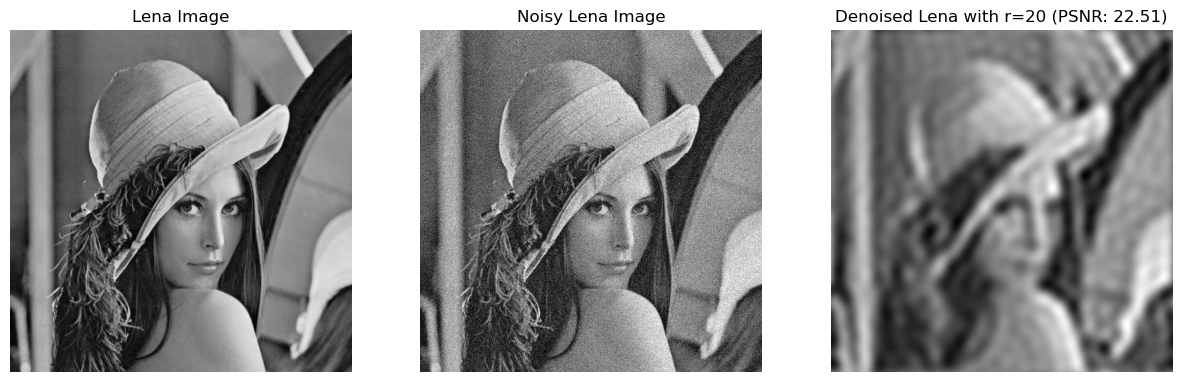

In [42]:
# Compute PSNR between the filtered image and the original image
psnr_value = PSNR(lena, denoised_lena_20)

# Plot the original image, gaussian noise image
plt.figure(figsize=(15, 6))

# Plot noisy image
plt.subplot(1, 3, 1)
plt.imshow(lena, cmap='gray')
plt.title('Lena Image')
plt.axis('off')

# Plot the denoised lena image
plt.subplot(1, 3, 2)
plt.imshow(lena_gaussian, cmap='gray')
plt.title('Noisy Lena Image')
plt.axis('off')

# Plot the denoised lena image
plt.subplot(1, 3, 3)
plt.imshow(denoised_lena_20, cmap='gray')
plt.title(f'Denoised Lena with r=20 (PSNR: {psnr_value:.2f})')
plt.axis('off')

10. Compare the denoised image with the denoised image using a cut-off radius of 60. How does the image and the PSNR differ? Why?

The visual quality of the denoised image with cut-off radius 20 is clearly worse. This denoised image is a lot blurrier than the image using cut-off radius of 60. This is evident as the PSNR is about 22.5 for radius 20 vs. 27.5 for radius 60. This makes sense as a smaller radius allows fewer frequencies to pass through, including important high-frequency details like edges. Thus, the filter with radius 20 excessively smooths out image features, causing a significant loss of sharpness and detail. 

11. What conclusions can you draw about the relationship between cut-off radius and resulting image after filtering? What is the trade-off in terms of noise reduction?

A smaller cut-off radius gets rid of more fine details in the image whereas a larger cut-off radius preserves more edges and fine details, leading to a more detailed image. The trade-off in terms of noise reduction is that while a smaller radius can reduce more noise, it also diminishes important image details, making the image overly smooth. A larger radius retains more details but might allow some noise to go through. Therefore, the cut-off radius must be carefully chosen to balance noise reduction and the preservation of image details.

Now let’s do the same thing with a Gaussian low-pass filter. Create a Gaussian low-pass filter kernel with a standard deviation of 60 and normalize it based on the highest value in the kernel. The Gaussian low-pass filter can be created using the provided gaussian filter function. Apply the Gaussian low-pass filter to the noisy image in the frequency domain and then perform an inverse Fourier transform. Plot the resulting denoised image and the corresponding PSNR.

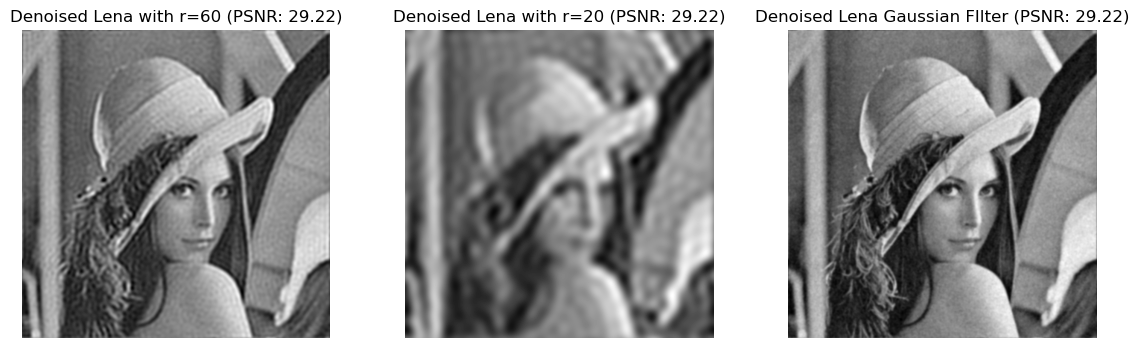

In [43]:
# Create a Gaussian filter with standard deviation 60
n_rows, n_cols = lena_gaussian.shape
gaussian_kernel = gaussian_filter(n_rows, n_cols, stdv=60)

# Apply Gaussian filter in the frequency domain
gaussian_lena_freq = F_lena_gaussian_shifted * gaussian_kernel

# Perform inverse Fourier transform to get the filtered image
filtered_lena_gaussian = np.abs(np.fft.ifft2(gaussian_lena_freq))

# Compute PSNR between the filtered image and the original image
psnr_value = PSNR(lena, filtered_lena_gaussian)

# Plot the original, noisy, and denoised images
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.imshow(denoised_lena, cmap='gray')
plt.title(f'Denoised Lena with r=60 (PSNR: {psnr_value:.2f})')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(denoised_lena_20, cmap='gray')
plt.title(f'Denoised Lena with r=20 (PSNR: {psnr_value:.2f})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_lena_gaussian, cmap='gray')
plt.title(f'Denoised Lena Gaussian FIlter (PSNR: {psnr_value:.2f})')
plt.axis('off')

plt.show()

12. Compare the denoised image with the denoised images produced using the ideal low-pass filters. How does the image and the PSNR differ? Is it better or worse? Why? Does it have the same type of image artifacts?

The denoised Lena image using the Gaussian low-pass filter looks the most clear and sharp out of the three denoised images. Visually, the Gaussian filter has higher contrast and preserves more fine details, resulting in a sharper image. The PSNR of around 29 indicates less distortion compared to the ideal low-pass filters, which had lower PSNR values. The more gradual cut-off of the Gaussian filter allows it to reduce noise effectively without excessively blurring the image, unlike the ideal low-pass filters which can introduce artifacts such as ringing due to their abrupt frequency cut-off. Hence, the Gaussian filter avoids those types of image artifacts that are pronounced with the ideal filters.

4 Filter Design
Examine the image frequnoisy.tif and its Fourier spectrum. Note the peaks in the spectrum corresponding to the periodic noise source, which has been added to the original image. Design and implement a frequency domain filter which filters out this noise. Justify your design.

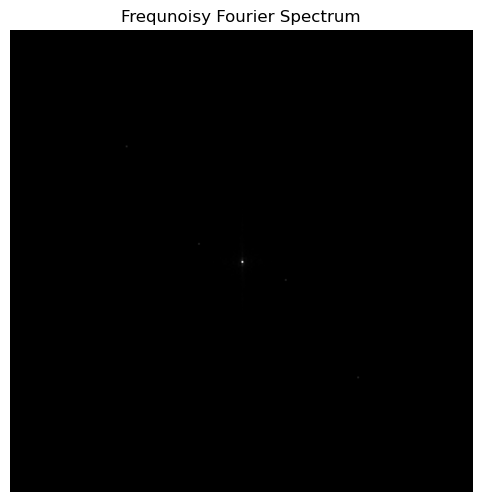

In [44]:
# Fourier spectrum frequnoisy image
F_frequnoisy = np.fft.fft2(frequnoisy)
F_frequnoisy_shifted = np.fft.fftshift(F_frequnoisy)
magnitude_spectrum_frequnoisy = np.abs(F_frequnoisy_shifted)

# Plot Fourier spectrum
plt.figure(figsize=(15, 6))
plt.title("Frequnoisy Fourier Spectrum")
plt.imshow(magnitude_spectrum_frequnoisy, cmap='gray')
plt.axis('off')
plt.show()

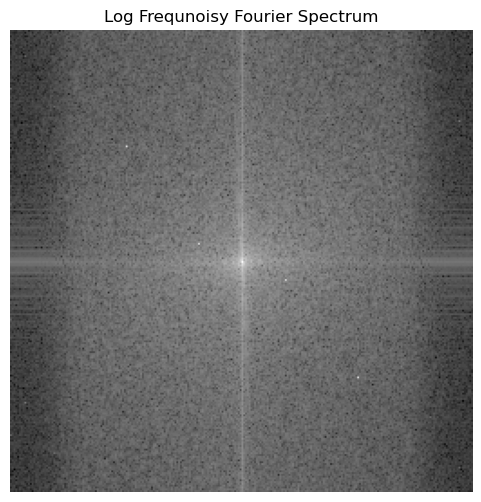

In [45]:
# Plot Fourier spectrum
plt.figure(figsize=(15, 6))
plt.title("Log Frequnoisy Fourier Spectrum")
plt.imshow(np.log(magnitude_spectrum_frequnoisy), cmap='gray')
plt.axis('off')
plt.show()


Updated detected peak coordinates:
Coordinate: (104, 118)
Coordinate: (152, 138)
Coordinate: (64, 64)
Coordinate: (192, 192)


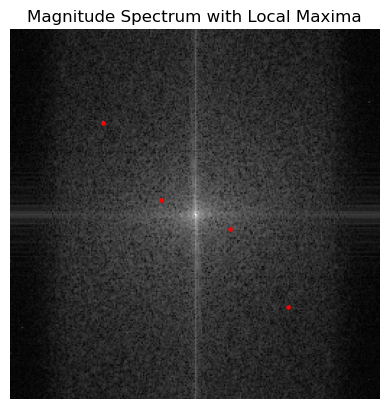

In [46]:
from skimage.feature import peak_local_max

# Find local maxima
coordinates = peak_local_max(magnitude_spectrum_frequnoisy, min_distance=10, threshold_abs=100)

# Remove the coordinate (128, 128) --> DC gain, don't want to remove that 'peak'
coordinates = coordinates[~np.all(coordinates == [128, 128], axis=1)]

# Print updated coordinates
print("\nUpdated detected peak coordinates:")
for coord in coordinates:
    print(f"Coordinate: ({coord[1]}, {coord[0]})")

# Plot the magnitude spectrum and mark the local maxima
plt.imshow(np.log(magnitude_spectrum_frequnoisy + 1), cmap='gray')  # Log scale for visibility
plt.title('Magnitude Spectrum with Local Maxima')
plt.axis('off')
plt.scatter(coordinates[:, 1], coordinates[:, 0], color='red', s=5)  # Scatter plot of maxima
plt.show()

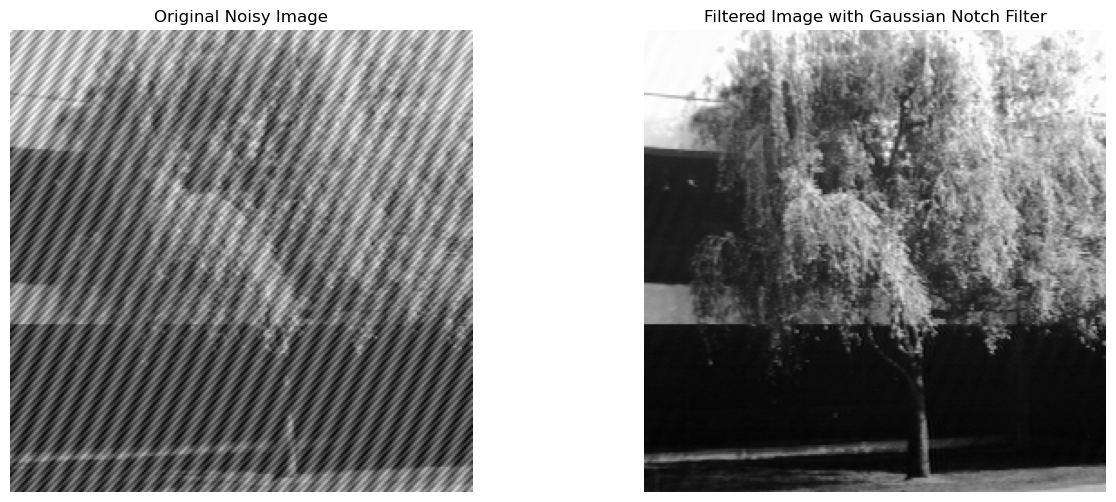

In [47]:
# Create an empty notch filter
notch_filter = np.ones_like(magnitude_spectrum_frequnoisy)

# Define a standard deviation for the Gaussian function
stdv = 2

# Loop through each peak to create the Gaussian notch filter
for peak in coordinates:
    y, x = peak
    # Use a Gaussian kernel centered at the peak
    gaussian_kernel = gaussian_filter(n_rows=notch_filter.shape[0], n_cols=notch_filter.shape[1], stdv=stdv)

    # Calculate the indices for slicing, ensuring they stay within bounds
    y_start = max(0, y - gaussian_kernel.shape[0] // 2)
    y_end = min(notch_filter.shape[0], y + gaussian_kernel.shape[0] // 2)
    x_start = max(0, x - gaussian_kernel.shape[1] // 2)
    x_end = min(notch_filter.shape[1], x + gaussian_kernel.shape[1] // 2)

    # Calculate the indices for the Gaussian kernel
    kernel_y_start = max(0, gaussian_kernel.shape[0] // 2 - y)
    kernel_y_end = kernel_y_start + (y_end - y_start)
    kernel_x_start = max(0, gaussian_kernel.shape[1] // 2 - x)
    kernel_x_end = kernel_x_start + (x_end - x_start)

    # Apply the Gaussian kernel to the notch filter
    notch_filter[y_start:y_end, x_start:x_end] -= gaussian_kernel[kernel_y_start:kernel_y_end, kernel_x_start:kernel_x_end]

# Apply the Gaussian notch filter to the Fourier spectrum
filtered_freq_spectrum = F_frequnoisy_shifted * notch_filter

# Inverse Fourier transform to get the filtered image
filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_freq_spectrum)))

# Plot results
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(frequnoisy, cmap='gray')
plt.title("Original Noisy Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image with Gaussian Notch Filter")
plt.axis('off')

plt.show()


Observing the log of the Fourier spectrum for the frequnoisy image, we can see that employing a bandreject filter to eliminate the noise peaks would also remove significant image details, as this filter uses arcs to encompass and suppress a range of frequencies around the noise peaks. This broad approach risks affecting the surrounding frequencies that contribute to the image's fine structures and overall quality. A notch filter specifically targets individual noise peaks with greater precision, allowing us to selectively attenuate only the unwanted frequencies. Thus, utilizing a notch filter is a more effective strategy for removing periodic noise in this case. 

The peaks in the frequnoisy image were detected using skimage.feature.peak_local_max and then these coordinates were removed using the notch filter.

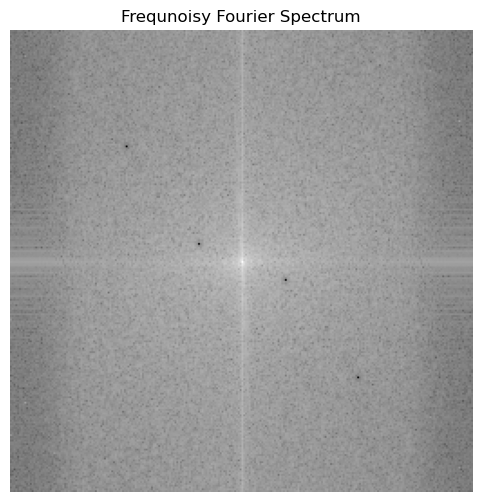

In [48]:
# Fourier spectrum frequnoisy image
F_frequnoisy = np.fft.fft2(filtered_image)
F_frequnoisy_shifted = np.fft.fftshift(F_frequnoisy)
magnitude_spectrum_frequnoisy = np.abs(F_frequnoisy_shifted)

# Plot Fourier spectrum
plt.figure(figsize=(15, 6))
plt.title("Frequnoisy Fourier Spectrum")
plt.imshow(np.log(magnitude_spectrum_frequnoisy), cmap='gray')
plt.axis('off')
plt.show()